In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df=pd.read_csv('Cleaned Data.csv', index_col=0)
df.head()

,Subject Age Group,Subject ID,Stop Resolution,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Weapon,Officer Age Group,Day of Week,Year,Month
0,26 - 35,0,No Action,1,White,Asian,Male,0.0,Gen X,Friday,2015,April
1218,1 - 17,0,No Action,1,White,White,Female,0.0,Millenial,Sunday,2015,May
1598,1 - 17,0,Arrest,1,White,American Indian or Alaska Native,Male,0.0,Millenial,Sunday,2015,September
1599,1 - 17,0,No Action,0,Not Specified,Unknown,Male,0.0,Millenial,Sunday,2015,April
1600,1 - 17,0,No Action,1,White,Black or African American,Male,0.0,Gen X,Sunday,2015,April


First, just to get a high view look at the data, I will graph each feature against the target variable , Stop Resolution.

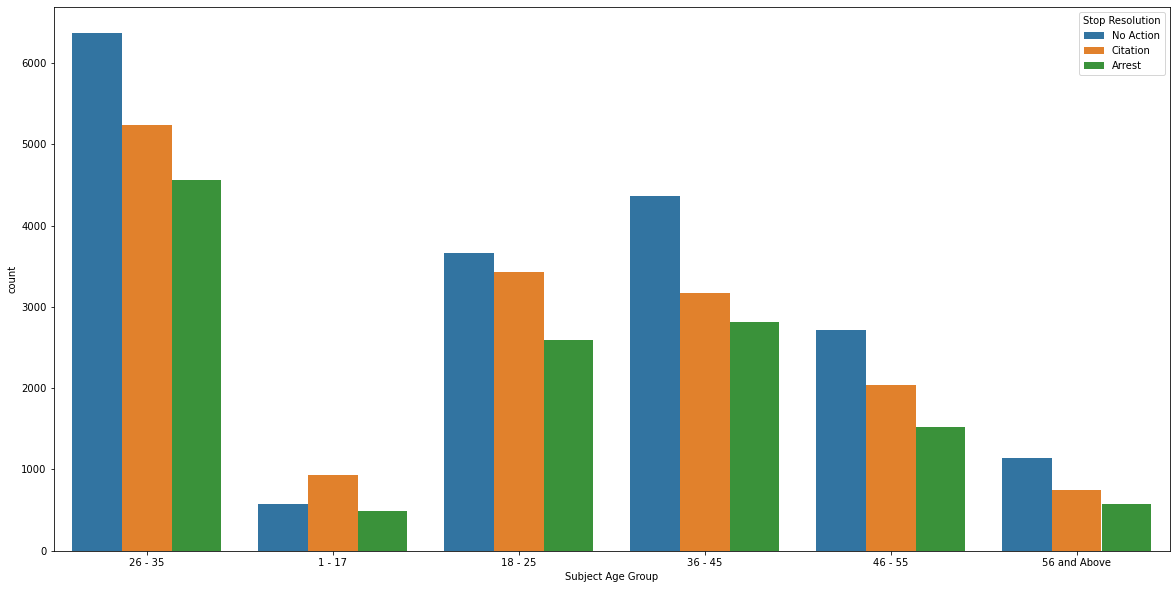

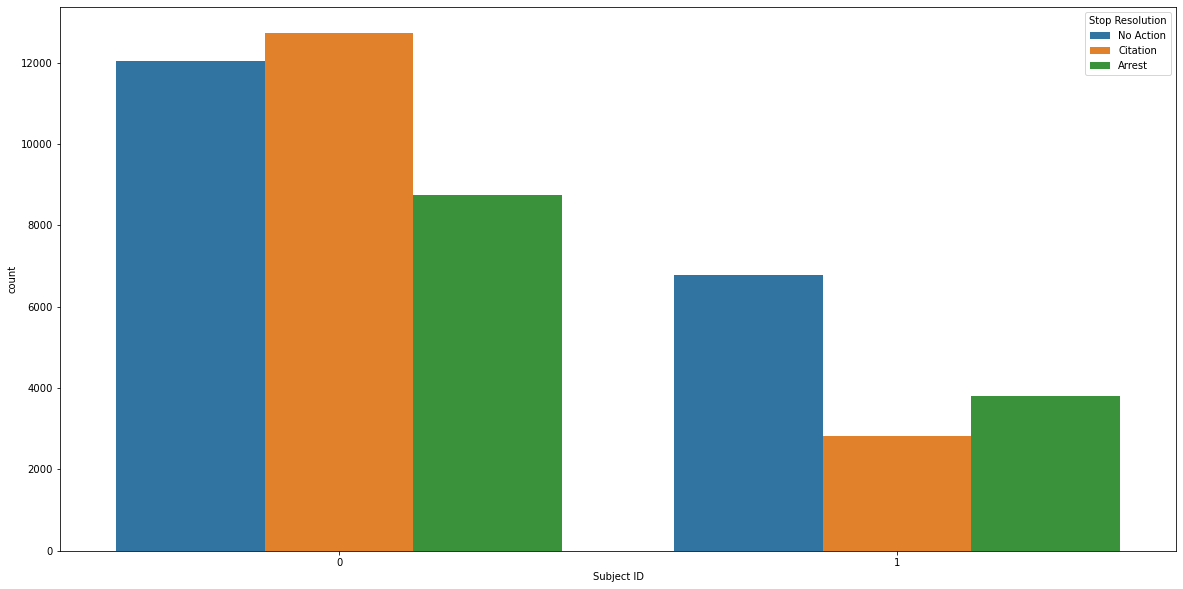

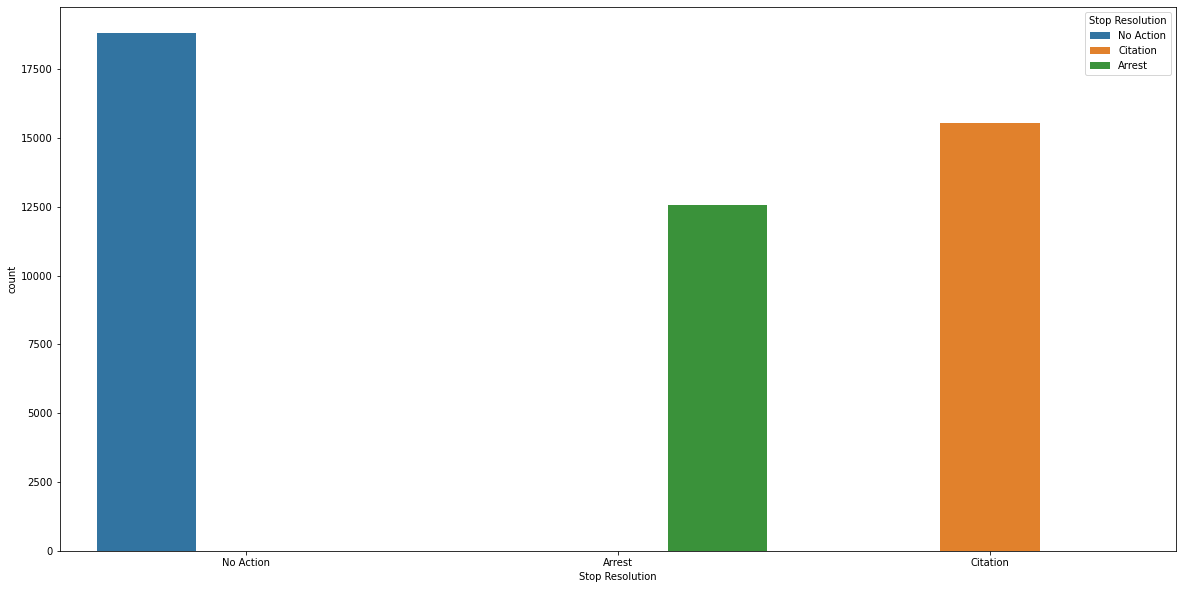

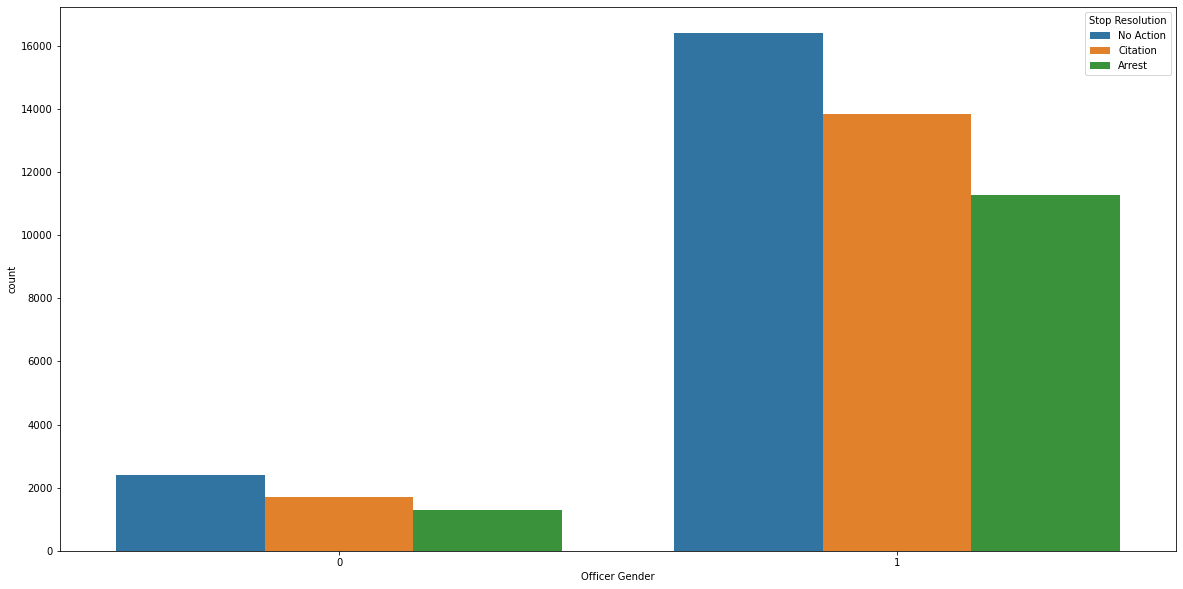

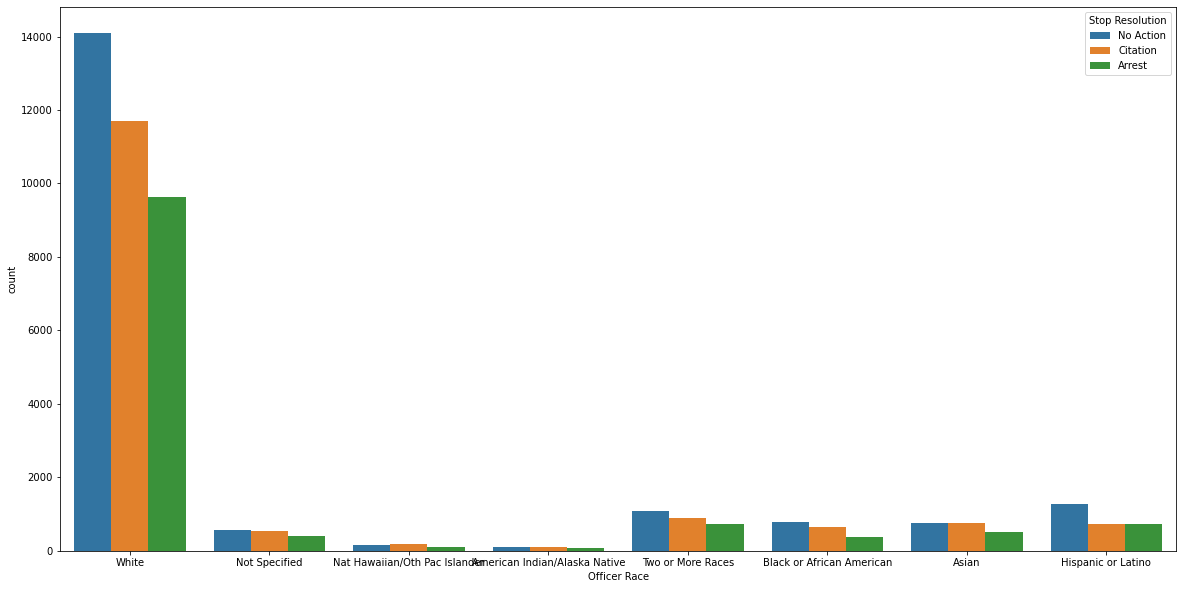

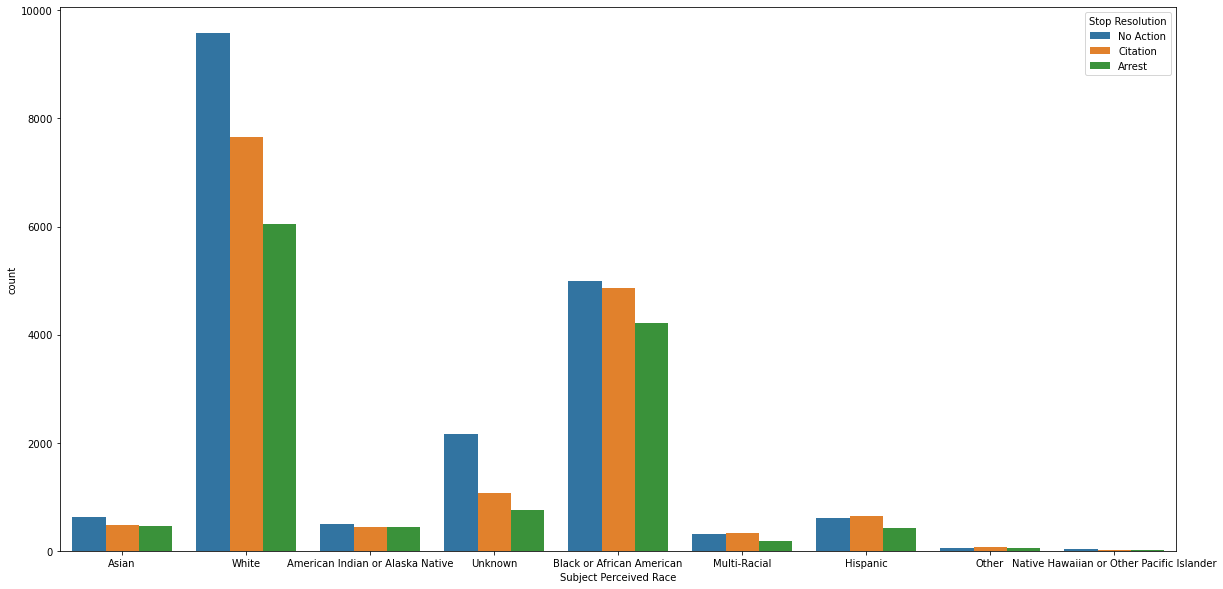

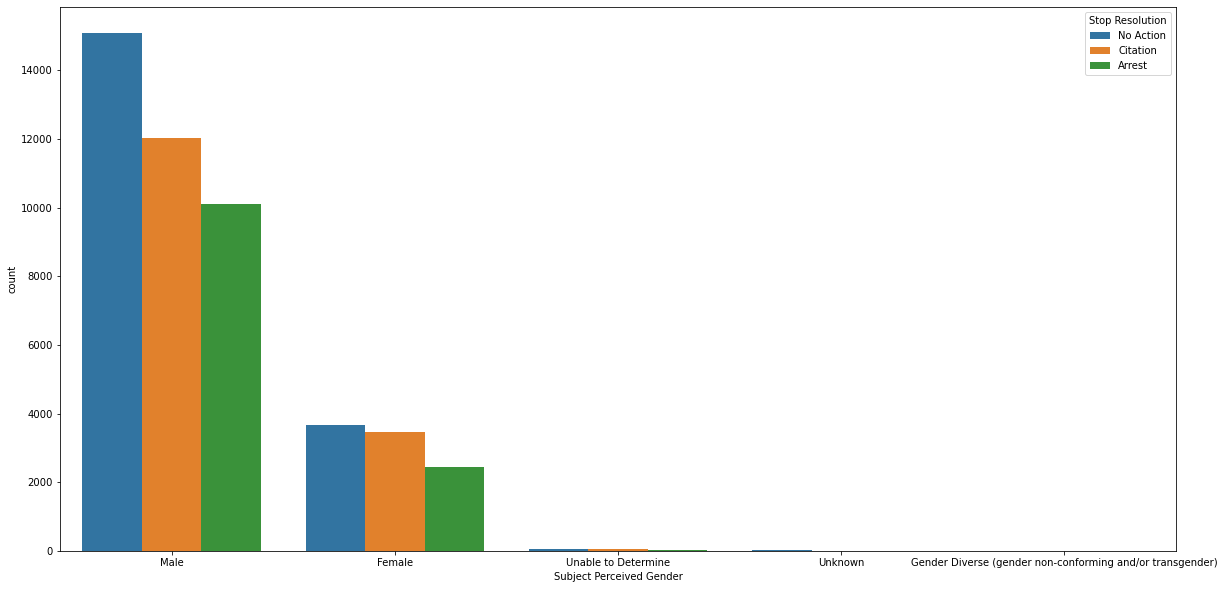

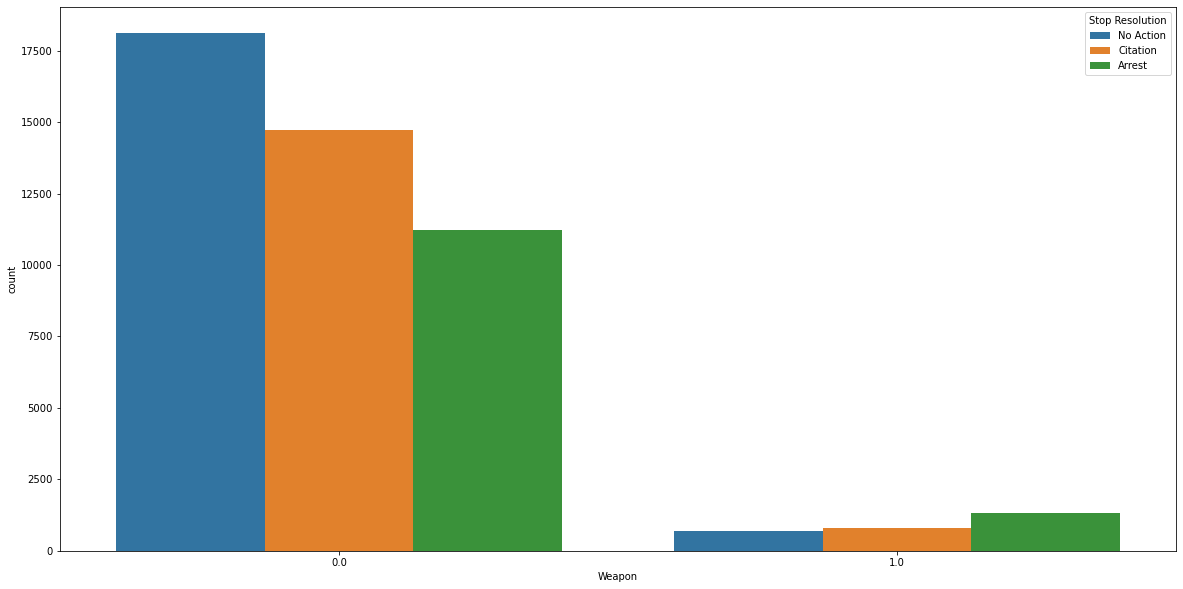

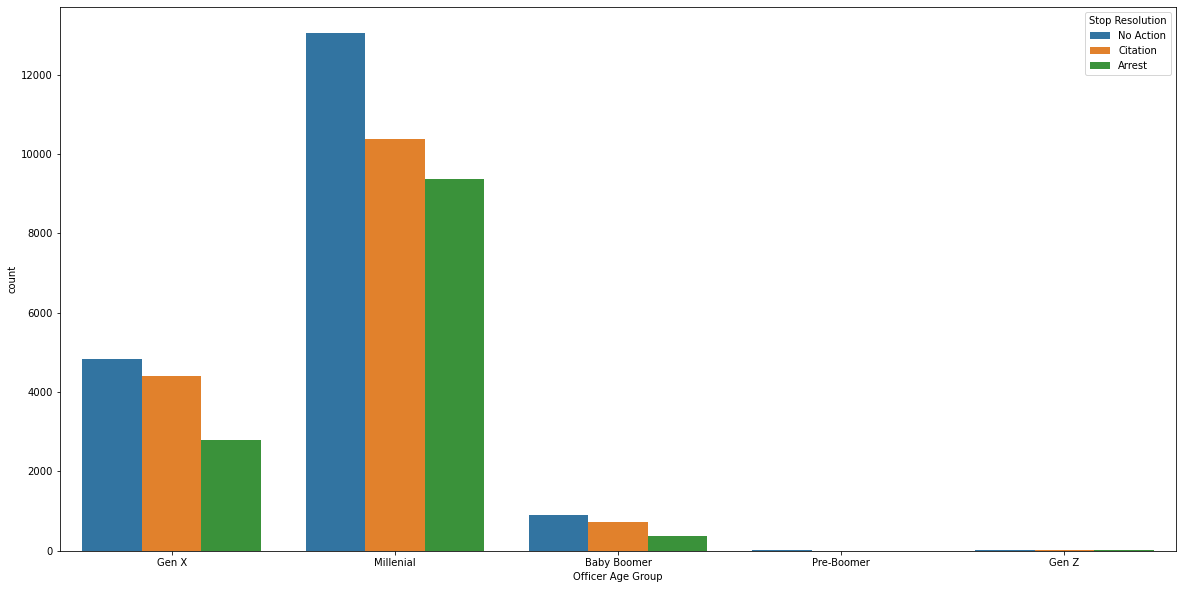

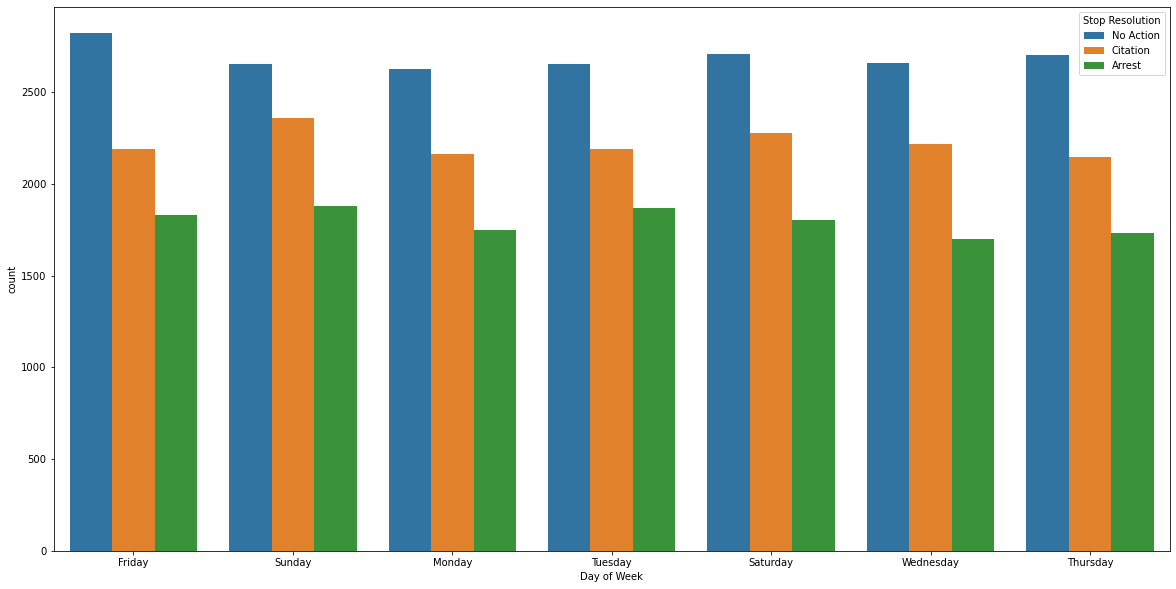

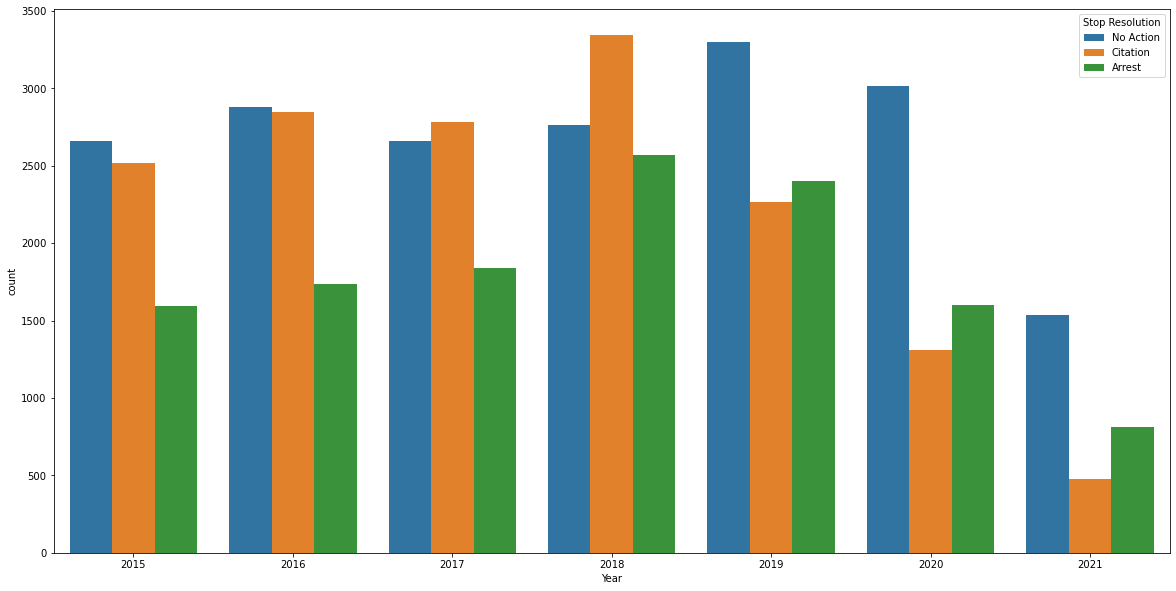

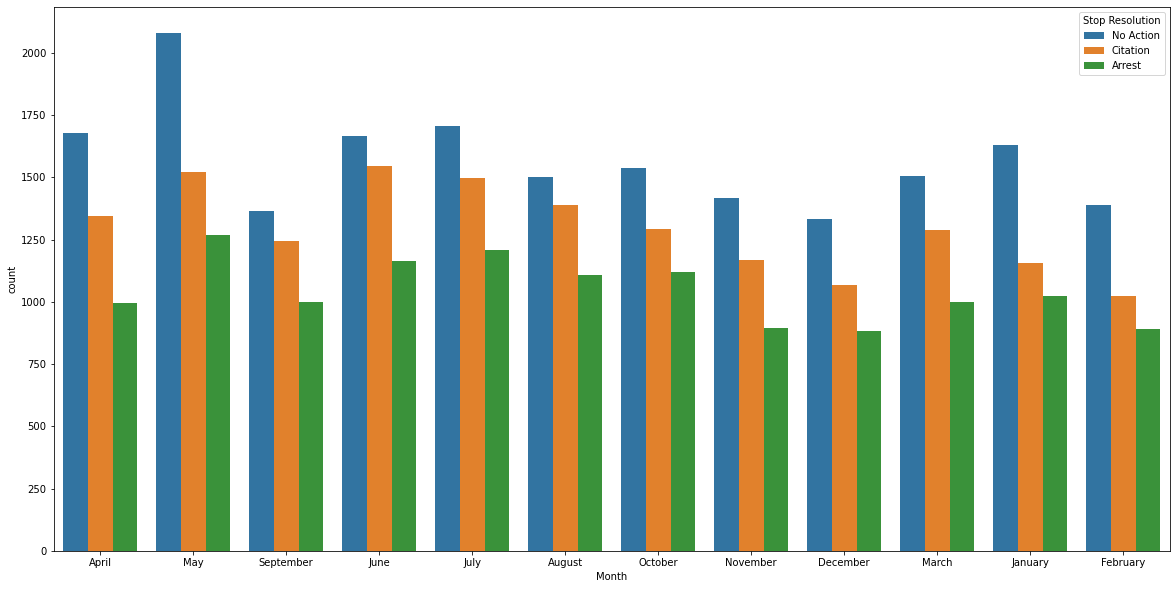

In [5]:
order = ['No Action', 'Citation', 'Arrest']

for column in df:
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.countplot(data=df, x=column, hue='Stop Resolution', hue_order=order)
    plt.show()

## Impact of COVID-19, CHAZ/CHOP and George Floyd Protests

I am curious to see if the major protests against injustice in policing that occurred in June 2020 had an impact on Terry Stops, and/or if the COVID-19 pandemic had a noticable impact on stops.

In [7]:
#Separate data by year for 2019 and 2020
df_2020 = df.loc[df['Year']==2020]
df_2019 = df.loc[df['Year']==2019]

months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

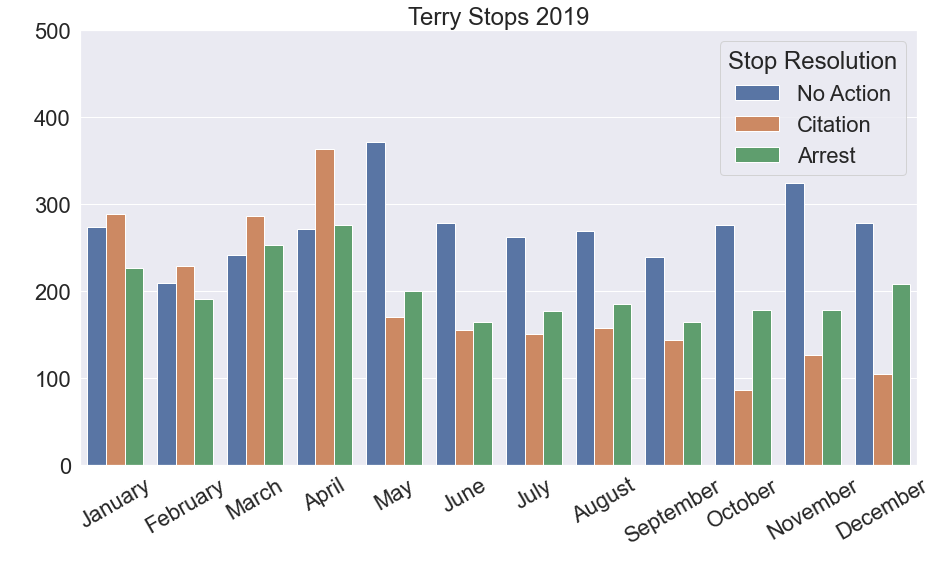

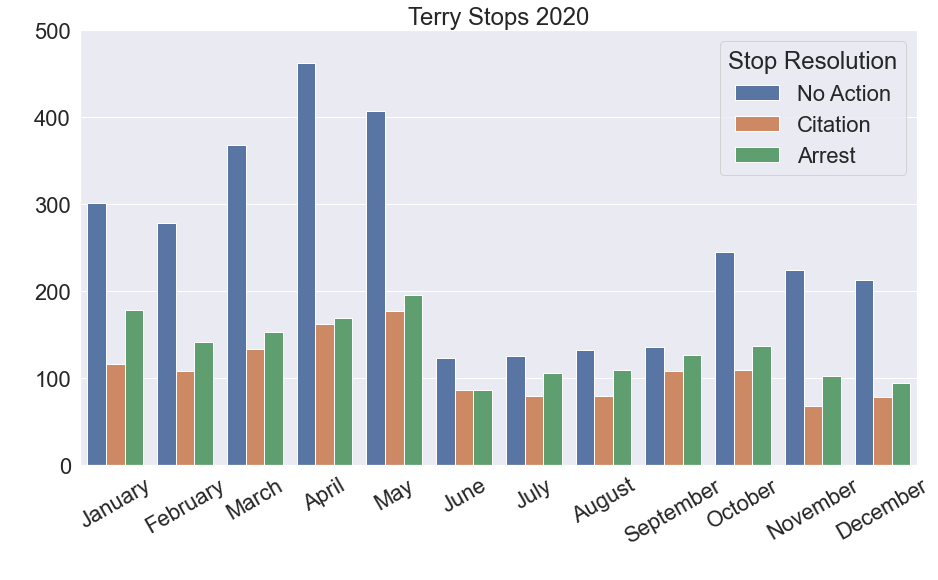

In [10]:
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df_2019, x='Month', hue='Stop Resolution', order=months, hue_order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(ylim=(0, 500))
ax.set_title('Terry Stops 2019')
ax.set_ylabel(' ')
ax.set_xlabel(' ')
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df_2020, x='Month', hue='Stop Resolution', order=months, hue_order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(ylim=(0, 500))
ax.set_title('Terry Stops 2020')
ax.set_ylabel(' ')
ax.set_xlabel(' ')
plt.show();

Interestingly, the first noticeable change is a major drop in the proportion of arrests beginning in May 2019. Further research would be required to determine what factors may contribute to this change. 
Beginning in March of 2020, there is a major spike in Terry Stops that do not result in citation or arrest. This can likely be explained by the strict "Shelter in Place" orders that were in affect at that time.
We also see an extreme drop in all Terry Stop activity beginning in June 2020, which correlates with major protests against injustice in policing and the beginning of CHAZ/CHOP.

## Racial Demographics

This naturally leads to an inquiry into whether the critiques levelled against the police are supported by the data in front of us. We can illustrate that by graphing the racial breakdown of Terry Stop subjects against the demographics of the city of Seattle at large. If there is no bias in policing, we would expect that the distribution of Terry Stop subjects race would closely resemble the entire city.
(Seattle race demographics are taken from [census.gov](https://www.census.gov/quickfacts/seattlecitywashington).

In [17]:
#racial demographics in Seattle (percentages)
seattle_demographics = {'White': 67.3,
                        'Asian': 15.4,
                        'Black or African American': 7.3,
                        'Multi-Racial': 6.9,
                        'Hispanic': 6.7,
                        'American Indian or Alaska Native': 0.5,
                        'Native Hawaiian or Other Pacific Islander': 0.3,
                       }

In [13]:
data = df['Subject Perceived Race'].value_counts()
data

White                                        23273
Black or African American                    14062
Unknown                                       3977
Hispanic                                      1659
Asian                                         1558
American Indian or Alaska Native              1365
Multi-Racial                                   801
Other                                          150
Native Hawaiian or Other Pacific Islander       67
Name: Subject Perceived Race, dtype: int64

In [18]:
race_df = data.to_frame()
race_df['percentage'] = race_df.apply(lambda x: (x/race_df['Subject Perceived Race'].sum())*100)
race_df['demographics'] = [67.3, 7.3, 0, 6.7, 15.4, 0.5, 6.9, 0, 0.3]

In [20]:
fig = go.Figure(data=[
    go.Bar(name='Percent of Terry Stops', x=race_df.index, y=race_df['percentage']),
    go.Bar(name='Seattle Demographics', x=race_df.index, y=race_df['demographics'])
])
fig.update_layout(barmode='group')

This graph shows that white people are under-represented as Terry Stop subjects and black people are majorly over-represented. 

In [25]:
race_2 = race_df.drop('White')
race_2.loc['Total'] = race_2.sum()

In [26]:
white = race_df.loc['White']
non_white = race_2.loc['Total']

In [27]:
race_3 = white.to_frame().T
race_3.loc['Non-White'] = non_white

In [28]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Percent of Terry Stops', x=race_3.index, y=race_3['percentage']),
    go.Bar(name='Seattle Demographics', x=race_3.index, y=race_3['demographics'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()